# Import Libraries

In [1]:
!pip install kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import kagglehub
import pandas as pd

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download the dataset

In [3]:
# Download latest version
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("Path to dataset files:", path)

100%|██████████| 242M/242M [00:06<00:00, 40.1MB/s] 

Extracting files...


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2


In [4]:
# Load the dataset
df = pd.read_csv(path + "/Reviews.csv")
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [5]:
# Print the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


# Extract Features and Target

In [6]:
# Score is the rating of the product. This will be our target variable.
df_score = df["Score"]
df_score

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

In [7]:
# Print the unique values of the target variable
df_score.unique()

array([5, 1, 4, 2, 3])

In [8]:
# Print the statistics of the target variable
score_statistics = df_score.describe()
score_statistics

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

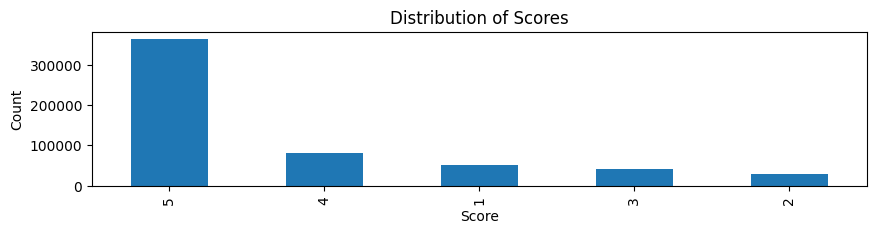

In [9]:
import matplotlib.pyplot as plt
# Plotting the bar chart for the value counts of the scores
score_counts = df_score.value_counts()
plt.figure(figsize=(10, 2))
score_counts.plot(kind='bar')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [10]:
# Summary is the title of the review. This will constitute our features.
df_summary = df["Summary"]
df_summary

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 568454, dtype: object

In [11]:
# Importing numpy for generating random indices
import numpy as np
# Generating 10 random indices from the range of df_score length
rand_idxs = np.random.randint(0, len(df_score), size=10)
# Iterating over the random indices to print corresponding Score and Summary
for idx in rand_idxs:
    print(f"Score: {df_score.iloc[idx]} - Summary: {df_summary.iloc[idx]}")

Score: 5 - Summary: Best ever.....
Score: 4 - Summary: Good bar, bad shipping
Score: 5 - Summary: Very Unique
Score: 5 - Summary: Excellent chips, full of flavor and just the right thickness and doneness
Score: 1 - Summary: Not fit for my dog
Score: 1 - Summary: Grinds
Score: 4 - Summary: I like the taste
Score: 4 - Summary: Well...
Score: 1 - Summary: Not very tasty
Score: 5 - Summary: A must for dieters


In [12]:
# We zero out the data to free up memory
df = 0

# Preprocessing

The Preprocessing steps we will use are:
1. Lower Casing
2. Replacing URLs
3. Replacing Emojis
4. Replacing Usernames
5. Removing Non-Alphabets
6. Removing Consecutive letters
7. Removing Short Words
8. Removing Stopwords
9. Lemmatization

## Lowercase

In [13]:
def lowercase_text(text):
    # Convert text to lowercase.
    return str(text).lower()

In [14]:
# Apply lowercase function to all summaries
df_summary = df_summary.apply(lowercase_text)

In [15]:
# Display a few examples to verify the transformation
print("After lowercase transformation:")
rand_idxs = np.random.randint(0, len(df_summary), size=10)
for idx in rand_idxs:  
    print(f"Score: {df_score.iloc[idx]} - Summary: {df_summary.iloc[idx]}")

After lowercase transformation:
Score: 5 - Summary: garlic, salt, pepper, chip  enjoy
Score: 5 - Summary: best k-cup coffee
Score: 5 - Summary: great product
Score: 4 - Summary: good olives
Score: 5 - Summary: my cats love this and can't get enough!
Score: 2 - Summary: not my taste
Score: 1 - Summary: whole grain bugs?
Score: 5 - Summary: best bread ever tried for far......
Score: 1 - Summary: this stuff is nasty
Score: 5 - Summary: great for your hair!


## Replace URLs

In [16]:
import re  # Importing the regular expressions module

# Define a regex pattern to identify URLs in the text
url_pattern = r"(?:https?|ftp)://[^\s/$.?#].[^\s]*"

def replace_urls(text):
    """
    Replace URLs in the text with the token 'URL'.
    Prints before and after if a replacement occurs.
    """
    text_str = str(text)
    replaced_text = re.sub(url_pattern, 'URL', text_str)

    if replaced_text != text_str:
        print(f"Before: {text_str}")
        print(f"After:  {replaced_text}\n")

    return replaced_text

In [17]:
# Apply URL replacement to all summaries
df_summary = df_summary.apply(replace_urls)

Before: http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title
After:  URL

Before: http://www.amazon.com/gp/product/b000v9lq30/ref=cm_cr_rev_prod_title
After:  URL

Before: http://www.amazon.com/gp/product/b001eq58fq/ref=cm_cr_rev_prod_title
After:  URL

Before: http://www.amazon.com/gp/product/b000eyobru/ref=cm_cr_rev_prod_title
After:  URL

Before: http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title
After:  URL



## Replacing Emojis

In [21]:
import re

# re.compile will compile the regex pattern into a regex object, necessary for 
# efficient pattern matching. This creates a reusable pattern object that can be
# used multiple times without recompiling the pattern each time, improving performance.
# u stands for Unicode
emoji_pattern = re.compile("["

    # Emoticons (e.g., 😀😁😂🤣😃😄😅😆)
    u"\U0001F600-\U0001F64F"  

    # Symbols & pictographs (e.g., 🔥🎉💡📦📱)
    u"\U0001F300-\U0001F5FF"  

    # Transport & map symbols (e.g., 🚗✈️🚀🚉)
    u"\U0001F680-\U0001F6FF"  

    # Flags (e.g., 🇺🇸🇬🇧🇨🇦 — these are pairs of regional indicators)
    u"\U0001F1E0-\U0001F1FF"  

    # Dingbats (e.g., ✂️✈️✉️⚽)
    u"\u2700-\u27BF"          

    # Supplemental Symbols & Pictographs (e.g., 🤖🥰🧠🦾)
    u"\U0001F900-\U0001F9FF"  

    # Symbols & Pictographs Extended-A (e.g., 🪄🪅🪨)
    u"\U0001FA70-\U0001FAFF"  

    # Miscellaneous symbols (e.g., ☀️☁️☂️⚡)
    u"\u2600-\u26FF"          

    "]+", flags=re.UNICODE)


In [22]:
# This pattern will match common text-based emoticons that aren't covered by the emoji Unicode ranges
# These emoticons are made up of regular ASCII characters like colons, parentheses, etc.
# Examples include:
# :) - happy face
# :( - sad face
# :D - laughing face
# ;) - winking face
emoticon_pattern = re.compile(r'(:\)|:\(|:D|:P|;\)|:-\)|:-D|:-P|:\'\(|:\||:\*)')

In [23]:
def remove_and_print(text):
    if emoji_pattern.search(text) or emoticon_pattern.search(text):
        print(f"Before: {text}")
        text = emoji_pattern.sub('', text)
        text = emoticon_pattern.sub('', text)
        print(f"After: {text}")
        print()
    return text

In [24]:
df_summary = df_summary.apply(remove_and_print)

Before: hot!  and good!  came back for more  :)
After: hot!  and good!  came back for more  

Before: yummy:)
After: yummy

Before: good 'ol dubble bubble taste! :-)
After: good 'ol dubble bubble taste! 

Before: should have listened to other bad reviews :(
After: should have listened to other bad reviews 

Before: has sucralose :(
After: has sucralose 

Before: not compatible with windows 7 :(
After: not compatible with windows 7 

Before: works great :)
After: works great 

Before: finally!  :)
After: finally!  

Before: satisfactory :)
After: satisfactory 

Before: coffee not great but the customer service is.  :)
After: coffee not great but the customer service is.  

Before: tastey :)
After: tastey 

Before: my baby simply loves it :)
After: my baby simply loves it 

Before: krunchy kracker heaven  :)
After: krunchy kracker heaven  

Before: a great cuppa tea:)
After: a great cuppa tea

Before: disco fever ;)
After: disco fever 

Before: neither cat will touch it :( but dogs go wi

## Replacing Usernames

In [25]:
import re

def replace_usernames(text):
    """
    Replace email addresses and true @usernames with 'USER'.
    Avoid matching embedded @ in profanity or stylized words.
    Print before and after if replacement occurs.
    """
    original = str(text)
    updated = original

    # Replace full email addresses
    updated = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', 'USER', updated)

    # Replace @usernames only when preceded by space, punctuation, or start of string
    updated = re.sub(r'(?:(?<=^)|(?<=[\s.,;!?]))@\w+\b', 'USER', updated)

    if updated != original:
        print(f"Before: {original}")
        print(f"After:  {updated}\n")
    
    return updated


# Apply username replacement to all summaries
df_summary = df_summary.apply(replace_usernames)

Before: reednikki71@yahoo.com
After:  USER

Before: stevezappa69@msn.com
After:  USER

Before: great taste, lower sodium than soy sauce, cheapest @amazon
After:  great taste, lower sodium than soy sauce, cheapest USER

Before: ndltx-49@embarqmail.com
After:  USER

Before: reednikki71@yahoo.com
After:  USER

Before: best tea @best price
After:  best tea USER price

Before: seb@clarityconnect.com
After:  USER

Before: reednikki71@yahoo.com
After:  USER

Before: crystal noodle soups kick @ss!
After:  crystal noodle soups kick USER!

Before: best tea @best price
After:  best tea USER price

Before: not anything close to the ones discontinued @costco
After:  not anything close to the ones discontinued USER

Before: seb@clarityconnect.com
After:  USER

Before: seb@clarityconnect.com
After:  USER

Before: my @1 fave salad dressing!
After:  my USER fave salad dressing!

Before: reednikki71@yahoo.com
After:  USER

Before: reednikki71@yahoo.com
After:  USER

Before: kjud@hotmail.com
After:  USER

## Removing Non-Alphabets

In [26]:
import re

def clean_text(text, keep_punct=False):
    """
    Clean and normalize text for NLP classification tasks.
    
    Parameters:
    - text (str): The input text to be cleaned.
    - keep_punct (bool): 
        If True, retains key punctuation (. ! ?) which may carry emotional or contextual weight.
        If False, removes all non-alphabetic characters for simpler lexical analysis.
    
    Returns:
    - str: The cleaned text string, lowercased and stripped of unwanted characters.
    
    This function is designed for flexibility across different NLP tasks like sentiment analysis,
    topic classification, or spam detection. It handles:
    - Lowercasing text for normalization
    - Removing or preserving select punctuation
    - Removing digits, symbols, and special characters
    - Reducing multiple spaces to a single space
    - Optionally printing changes for debugging or logging

    When to use `keep_punct=True`:
    - Sentiment analysis: punctuation (e.g., "!", "?") can reflect strong emotion
    - Social media or informal text: expressive punctuation often carries signal
    - Sarcasm, emphasis, or tone-sensitive tasks

    When to use `keep_punct=False`:
    - Topic classification or document clustering: punctuation rarely adds value
    - Preprocessing for bag-of-words, TF-IDF, or topic modeling
    - When punctuation is inconsistent or noisy (e.g., OCR scans, scraped data)
    """
    
    # Convert input to string (safe handling)
    original = str(text)

    if keep_punct:
        # Keep only lowercase letters, spaces, and select punctuation (. ! ?)
        # Useful for capturing tone/sentiment
        cleaned = re.sub(r"[^a-z\s.!?]", "", original)
    else:
        # Keep only lowercase letters and spaces; remove all punctuation and symbols
        cleaned = re.sub(r"[^a-z\s]", "", original)

    # Normalize whitespace (collapse multiple spaces to one, strip leading/trailing)
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()

    # Optional: print before and after if a change occurred
    if original != cleaned:
        print(f"Before: {text}")
        print(f"After:  {cleaned}\n")

    return cleaned

In [ ]:
# Apply non-alphabet removal to all summaries
df_summary = df_summary.apply(lambda x: clean_text(x, keep_punct=True))

## Removing Consecutive letters

In [58]:
def remove_consecutive_letters(text, max_repeat=2):
    """
    Normalize elongated words by limiting repeated characters.

    In informal or emotional text (e.g., reviews, tweets), users often repeat letters
    to add emphasis: "sooooo good", "loooove it", "greeaaat".
    
    This function reduces any character repeated more than `max_repeat` times 
    to exactly `max_repeat` occurrences (default: 2), preserving emphasis without bloating vocabulary.

    Parameters:
    - text (str): The input text
    - max_repeat (int): The maximum allowed repetitions for any character

    Returns:
    - str: Text with repeated characters normalized
    """
    text_str = str(text)
    pattern = r'(\w)\1{' + str(max_repeat) + r',}'
    cleaned = re.sub(pattern, r'\1' * max_repeat, text_str)

    # Print only if changes were made
    if cleaned != text_str:
        print(f"Before: {text_str}")
        print(f"After:  {cleaned}\n")

    return cleaned

In [ ]:
# Apply consecutive letter removal to all summaries
df_summary = df_summary.apply(lambda x: remove_consecutive_letters(x, max_repeat=2))

## Removing Short Words

In [60]:
def remove_short_words(text, min_length=3, preserve_words=None):
    """
    Remove short words from text based on a minimum length threshold.
    
    Parameters:
    - text (str): The input text
    - min_length (int): Minimum word length to keep (default = 3)
    - preserve_words (set or list): Optional set of short but important words to keep (e.g., {'no', 'not'})
    
    Returns:
    - str: Text with short words removed, except for preserved ones
    
    Notes:
    - Use with care in sentiment analysis. Important short words like 'no', 'not', 'bad' may affect meaning.
    - Best used after stopword removal or on very noisy text.
    """
    preserve = set(preserve_words or [])
    words = str(text).split()
    filtered = [word for word in words if len(word) >= min_length or word.lower() in preserve]
    result = ' '.join(filtered)

    if result != text:
        print(f"Before: {text}")
        print(f"After:  {result}\n")

    return result

In [ ]:
# Apply short word removal to all summaries
df_summary = df_summary.apply(lambda x: remove_short_words(x, min_length=3, preserve_words={'no', 'not'}))

## Removing Stopwords

In [ ]:
# NLTK (Natural Language Toolkit) is a popular library for natural language processing in Python
# https://www.nltk.org/
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

print("Sample stopwords:", list(stopwords.words('english'))[:10])

In [64]:
# Define stopwords but keep critical ones like "not"
base_stopwords = set(stopwords.words('english'))
preserve = {'no', 'not', 'nor', 'never'}
custom_stopwords = base_stopwords - preserve

In [65]:
def remove_stopwords(text):
    """
    Remove stopwords from text, preserving key negation words.

    This function uses a customized stopword list that retains important
    short words like 'not', 'no', 'nor', and 'never' which carry significant
    meaning in tasks like sentiment analysis.

    Parameters:
    - text (str): Lowercased input text

    Returns:
    - str: Text with stopwords removed, but critical negation words preserved
    """
    words = str(text).split()
    filtered = [word for word in words if word not in custom_stopwords]
    result = ' '.join(filtered)

    if result != text:
        print(f"Before: {text}")
        print(f"After:  {result}\n")

    return result

In [ ]:
# Apply remove_stopwords
df_summary = df_summary.apply(remove_stopwords)

## Lemmatization

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download required NLTK resources
nltk.download('wordnet')  # Download WordNet, a lexical database of English words
nltk.download('omw-1.4')  # WordNet Lemmas sometimes need this, which is a mapping of WordNet lemmas to their Part of Speech (POS) tags.
nltk.download('averaged_perceptron_tagger_eng')  # Download English POS tagger

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# POS mapping function 
# POS tags can be: ADJ (adjective), ADV (adverb), NOUN (noun), VERB (verb), etc
def get_wordnet_pos(tag):
    # Determine the WordNet POS tag based on the first letter of the input tag
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to Noun if no match


def lemmatize_text(text):
    """
    Lemmatize text using WordNet lemmatizer with POS tagging.

    This version prints each change along with the POS tag of the changed word.
    """
    # Convert the input text to a string to ensure compatibility
    original_text = str(text)
    # Split the text into individual words
    words = original_text.split()
    # Obtain Part of Speech (POS) tags for each word
    pos_tags = pos_tag(words)

    # Initialize lists to store lemmatized words and any changes
    lemmatized_words = []
    changes = []

    # Iterate over each word and its POS tag
    for word, tag in pos_tags:
        # Map the POS tag to a WordNet POS tag
        wn_tag = get_wordnet_pos(tag)
        # Lemmatize the word using the mapped POS tag
        lemma = lemmatizer.lemmatize(word, wn_tag)

        # Check if the lemmatized word is different from the original
        if lemma != word:
            # Record the change if a difference is found
            changes.append((word, lemma, tag))
        # Add the lemmatized word to the list
        lemmatized_words.append(lemma)

    # Join the lemmatized words back into a single string
    result = ' '.join(lemmatized_words)

    # Print only if there were changes
    if changes:
        print(f"\nOriginal: {original_text}")
        print(f"Lemmatized: {result}")
        for original, lemma, pos in changes:
            print(f"  - {original} → {lemma}  (POS: {pos})")

    return result

In [ ]:
# Apply lemmatization to all summaries
df_summary = df_summary.apply(lemmatize_text)

# Visualize

## Word Cloud for positive sentiments

In [ ]:
from wordcloud import WordCloud

# Filter summaries for df_score >= 4
filtered_summaries = df_summary[df_score >= 4]

# Combine all filtered summaries into a single string
all_summaries = " ".join(str(summary) for summary in filtered_summaries)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

# Clear the memory
all_summaries = 0

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud for negative sentiments

In [ ]:
from wordcloud import WordCloud

# Filter summaries for df_score 1
filtered_summaries = df_summary[df_score == 1]

# Combine all filtered summaries into a single string
all_summaries = " ".join(str(summary) for summary in filtered_summaries)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

# Clear the memory
all_summaries = 0

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()